## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-008-010-Model-Bagging

## MLxtend: 
### Providing machine learning and data science utilities and extensions to Python’s scientific computing stack
### Thanks, Sebastian Raschka

In [1]:
#!pip install mlxtend

In [2]:
import itertools

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

import numpy as np
import pandas as pd

np.random.seed(321)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [ ]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target

In [3]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf2 = KNeighborsClassifier(n_neighbors=3)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

Accuracy: 0.63 (+/- 0.04) [Decision Tree]
Accuracy: 0.73 (+/- 0.03) [K-NN]
Accuracy: 0.74 (+/- 0.04) [Bagging Tree]
Accuracy: 0.69 (+/- 0.04) [Bagging K-NN]


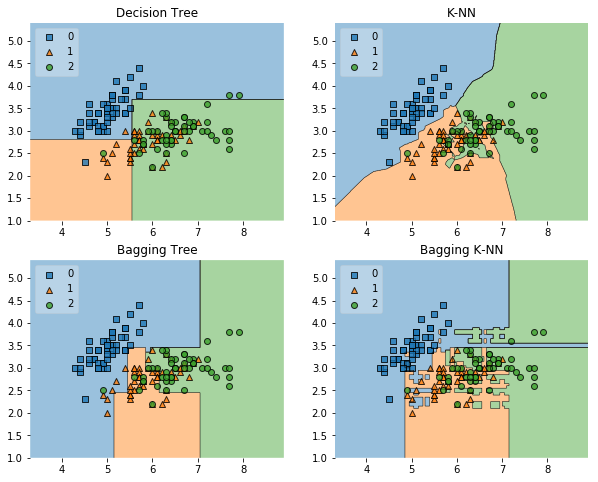

In [4]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ('Accuracy: %.2f (+/- %.2f) [%s]' %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

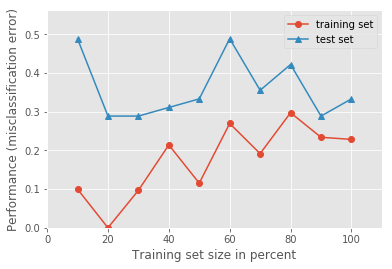

In [5]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [6]:
#Ensemble Size
num_est = np.linspace(1,100,10).astype(int)
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=5, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

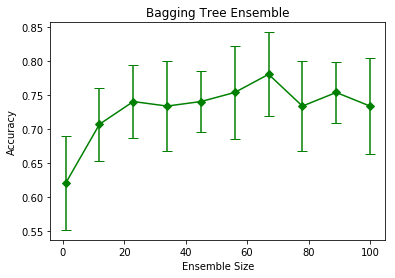

In [7]:
plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='green', fmt='-D', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

## Done

In [ ]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))